# Data Visualization with Python
---






## What and Why Data Visualization? 
![alt text](https://blog.hubspot.com/hs-fs/hub/53/file-2576089202-png/00-Blog_Thinkstock_Images/data-visualization-examples.png)


One of the key skills of a data scientist is the ability to tell a compelling story. The human brain processes visual information much better and more quickly than text.

Visualizing data helps extract information, better understand the data, and make effective decisions. 

The main goal of this tutorial is to help you get started with making visualizations in Python.

We will go over the landscape of Python Visualization tools, and then use matplotlib, seaborn, and folium to teach you how to take data that at first glance has little meaning and expose the underlying trends and correlations in a form that makes sense to people.

## Python Data Visualization Landscape


![Python Landscape](https://rougier.github.io/python-visualization-landscape/landscape-colors.png)


# Basic Visualizations



##Line Plot

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

##Area Plot
An area plot also known as an area chart or graph is a type of plot that depicts accumulated totals using numbers or percentages over time. It is based on the line plot and is commonly used when trying to compare two or more quantities

## Histogram
A histogram is a way of representing the frequency distribution of a numeric dataset. The way it works is it partitions the spread of the numeric data into bins, assigns each datapoint in the dataset to a bin, and then counts the number of datapoints that have been assigned to each bin. So the vertical axis is actually the frequency or the number of datapoints in each bin.

## Bar Chart 
A bar chart is a very popular visualization tool. Unlike a histogram, a bar chart also known as a bar graph is a type of plot where the length of each bar is proportional to the value of the item that it represents. It is commonly used to compare the values of a variable at a given point in time. 

## Waffle Chart
A waffle chart is a great way to visualize data in relation to a whole or to highlight progress against a given threshold.

 ## Word Cloud
 A word cloud is simply a depiction of the importance of different words in the body of text. A word cloud works in a simple way; the more a specific word appears in a source of textual data the bigger and bolder it appears in the world cloud.

# Data Preparation
To visualize and plot data, we have to prepare our data source.
We are using Pandas, a popular data structure library to load, explore, and process our data.



In [0]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd 
pd.options.display.float_format = '{:.2f}'.format 
pd.options.display.min_rows = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('movies_metadata.csv') #load data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.39,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [0]:
df.shape

(45466, 24)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [0]:
df.isnull().sum()/df.shape[0]*100 # check for percentage of missing data by column


adult                    0.00
belongs_to_collection   90.12
budget                   0.00
genres                   0.00
homepage                82.88
id                       0.00
imdb_id                  0.04
original_language        0.02
original_title           0.00
overview                 2.10
popularity               0.01
poster_path              0.85
production_companies     0.01
production_countries     0.01
release_date             0.19
revenue                  0.01
runtime                  0.58
spoken_languages         0.01
status                   0.19
tagline                 55.10
title                    0.01
video                    0.01
vote_average             0.01
vote_count               0.01
dtype: float64

# Pointed Questions
### 1. What is the average budget by original language?

In [0]:
#convert to correct data types. budget to number
df.budget = pd.to_numeric(df.budget, errors = 'coerce')
df.popularity = pd.to_numeric(df.popularity, errors = 'coerce')


In [0]:
df['original_language'] = df['original_language'].astype('str')

In [0]:
df.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', 'nan', '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr',
       'lo', 'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm',
       'mt', '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [0]:
df = df[df['original_language'] != '68.0']
df = df[df['original_language'] != '82.0']
df = df[df['original_language'] != '104.0']

In [0]:
df.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', 'nan', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [0]:
df_test = df[['original_language','budget']]
df_test.head(10)
df_grp = df_test.groupby(['original_language'], as_index = False).mean()
df_grp.head(10)

,original_language,budget
0,en,30000000.00
1,en,65000000.00
2,en,0.00
3,en,16000000.00
4,en,0.00
5,en,60000000.00
6,en,58000000.00
7,en,0.00
8,en,35000000.00
9,en,58000000.00


,original_language,budget
0,ab,0.00
1,af,1500000.00
2,am,0.00
3,ar,94871.79
4,ay,0.00
5,bg,79644.20
6,bm,666666.67
7,bn,0.00
8,bo,600000.00
9,bs,72296.64


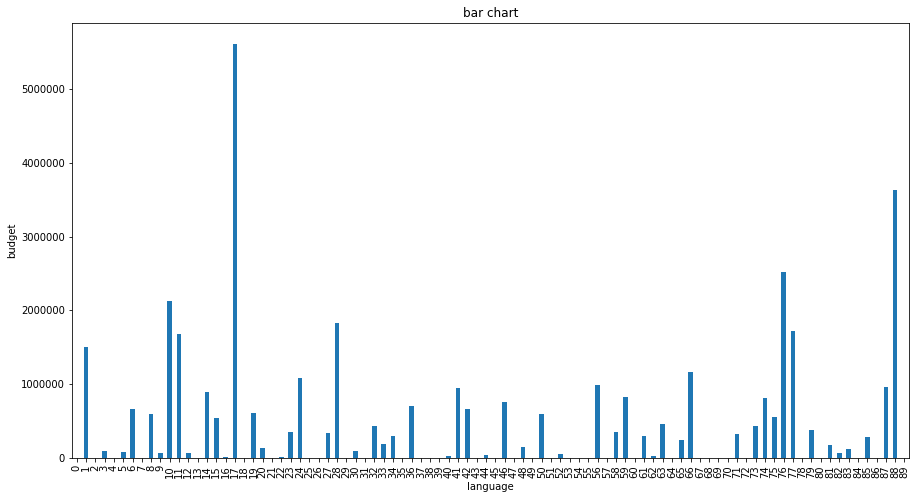

In [0]:
plt.figure(figsize = (15,8))
df_grp['budget'].plot(kind = 'bar')
plt.title('bar chart')
plt.ylabel('budget')
plt.xlabel('language')
plt.show();

### 2. What is the frequency distribution of the runtime?

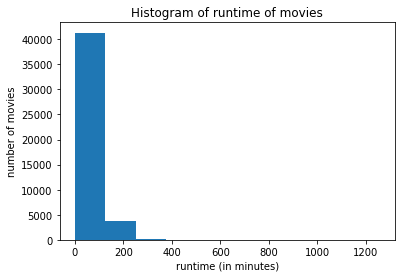

In [0]:
df['runtime'].plot(kind = 'hist')
plt.title('Histogram of runtime of movies')
plt.ylabel('number of movies')
plt.xlabel('runtime (in minutes)')
plt.show();

### 3. The era of the 90s RomCom. Was that really a thing?

In [30]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [32]:
df[['original_title', 'genres', 'popularity', 'vote_average', 'release_date']].head()

,original_title,genres,popularity,vote_average,release_date
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.95,7.70,1995-10-30
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.02,6.90,1995-12-15
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.71,6.50,1995-12-22
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.86,6.10,1995-12-22
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",8.39,5.70,1995-02-10


In [0]:
def is_rom_com(genres):
    if ('Romance' in genres) and ('Comedy' in genres):
        return 1
    else:
        return 0

# data processing
# - convert release_date str to datetime object
# - identify genres assigned to a movie
# - drop non-meaningful values in release_date
df = df[df['release_date'] != '1']
df = df[df['release_date'] != '12']
df = df[df['release_date'] != '22']
df.dropna(subset=['release_date'], inplace=True)
df['is_rom_com'] = df['genres'].apply(lambda x: is_rom_com([genre['name'] for genre in eval(x)]))
df['release_year'] = df['release_date'].apply(lambda y: dt.datetime.strptime(y, '%Y-%m-%d').year)
rom_coms_by_year = df.groupby(['release_year'])['is_rom_com'].sum()

In [0]:
rom_coms_by_year.tail()

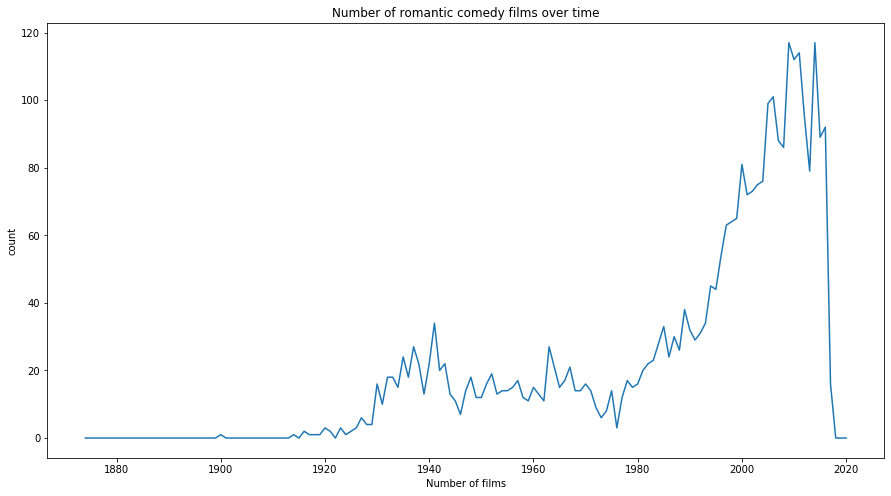

In [25]:
figsize = (15,8)
plt.figure(1, figsize=figsize)
plt.plot(rom_coms_by_year.index, rom_coms_by_year.values)
plt.title('Number of romantic comedy films over time')
plt.ylabel('count')
plt.xlabel('Number of films');


### 4. Is there a relationship between a movie's rating and the amount of revenue it generates?

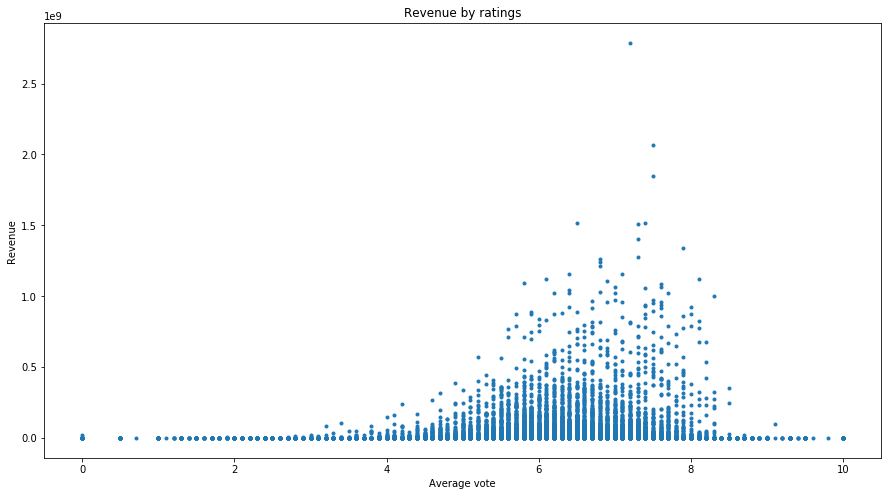

In [54]:
plt.figure(2, figsize=figsize)
plt.plot(df['vote_average'], df['revenue'], '.')
plt.title('Revenue by ratings')
plt.ylabel('Revenue')
plt.xlabel('Average vote');

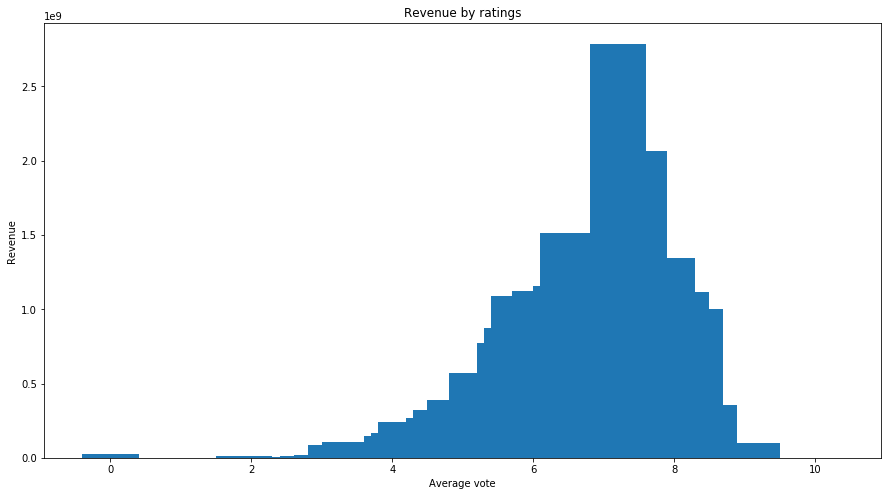

In [55]:
plt.figure(3, figsize=figsize)
plt.bar(df['vote_average'], df['revenue'])
plt.title('Revenue by ratings')
plt.ylabel('Revenue')
plt.xlabel('Average vote');

# Potential questions
Are foreign langauge films higher rated?

#References + Resources
- [Python Graphy Gallery](https://python-graph-gallery.com/). A website that features a collection of graphs and reproducible python code to generate those graphs. 
- [Pyviz](http://pyviz.org/). An open platform dedicated to helping users decide on the best open-source (OSS) Python data visualization tools. 
- [Matplotlib](http://aosabook.org/en/matplotlib.html). An article about the history and architecture of Matplotlib, written by its founders. 
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
- The dataset is assembled by user rounakbanik on Kaggle. Learn more about her project [here](https://www.kaggle.com/rounakbanik/the-movies-dataset). 
- [Python Grids](http://www.pythongrids.org/grids/g/data-visualization/) is a website that compares stats on 14 Python plotting libraries.
